This visualizes the results from training on server.
Run run_train.py on the server, then download the checkpoints, vocab.pic, losses.npy and config.py.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 6.0)
import tensorflow as tf
import importlib
import pickle

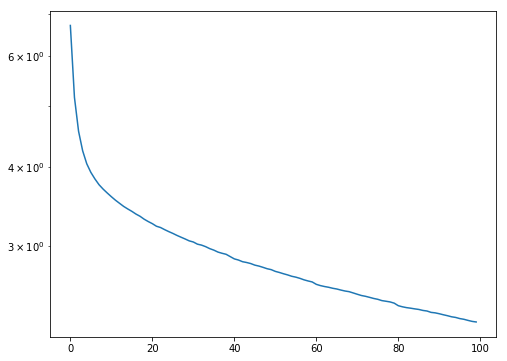

In [2]:
losses = np.load('losses.npy')
plt.semilogy(losses)

## Infer

In [3]:
# reload the module and reimport in case of change in code
import lstm_language_model
importlib.reload(lstm_language_model)
from lstm_language_model import RNNLanguageModel

In [4]:
# We need to download the vocab, because the tokenization is done differently there than on my laptop (don't know why).
with open('vocab.pic', 'rb') as f:
    vocab = pickle.load(f)
id_word = [v[0] for v in vocab]
word_id = {w:i for i,w in enumerate(id_word)}
vocab_size = len(vocab)
vocab_size

16750

In [6]:
import config
importlib.reload(config)
from config import *

tf.reset_default_graph()
sess = tf.Session()
model = RNNLanguageModel(embedding_size=embeding_size, learning_rate=learning_rate, lstm_size=lstm_size, num_steps=num_steps, vocab_size=vocab_size, sess=sess, checkpoint_path=checkpoint_path)
model.build(model_type='infer')
model.saver.restore(sess, 'from-server/' + checkpoint_path + '-1000')

INFO:tensorflow:Restoring parameters from from-server/checkpoints/coco.ckp-1000


In [7]:
seq = ['START']
seq = [word_id[s] for s in seq]
state = init_state = np.zeros((2, 1, lstm_size))

num_words = 500

for i in range(len(seq)-1, num_words):
    p, state = model.infer(np.reshape(seq[-1], (1,1)), np.array([1]), state)
#     max_id = np.argmax(p)
    p = p.reshape([-1])
    max_id = np.random.choice(list(range(len(p))), p=p)
    seq.append(max_id)
    print(id_word[max_id], end=' ')
    if max_id == word_id['END']: # restart the sentence
        print()
        seq.append(word_id['START'])
        state = init_state

A couple of men playing a game of frisbee watching END 
A group of young men walking next to a truck with graffiti . END 
many elephants tree in a dirt lot door for a fence END 
a man in the snow skiing stands in a living room END 
People near the ocean with their boards on the front of a vintage train . END 
a desktop and a book with her hand . END 
Different kinds of food contains glass of broccoli and pepperoni . END 
A man carrying a surfboard upside down on the beach . END 
an industrial sized bowl on a table by a spoon END 
Woman on display in small boat with his feet up END 
A couple of kids sitting at a table near a cup with a drink of water . END 
See picture of a formal affair surrounding it on the beach . END 
Different fruits being prepared in a living room . END 
A kitchen is shown filled with pots and pans . END 
Some sheep and goats graze in a grass trough he huddled together . END 
Two people playing frisbee jumping in the air . END 
A large black bear standing next to 